<a href="https://colab.research.google.com/github/AnabelBerumen/DataScientist/blob/main/estad%C3%ADstica/Regresi%C3%B3n_Log%C3%ADstica_implementaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [199]:
import pandas as pd
import numpy as np

In [200]:
data = pd.read_csv('/content/bank.csv', sep=';')

In [201]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [202]:
data.shape

(4119, 21)

In [203]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [204]:
# transformar los datos de y[yes/no] a [0,1]
data['y'] = (data['y'] == 'yes').astype(int)

In [205]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [206]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [207]:
data['education'] = np.where(data['education']== 'basic.4y', 'Basic', data['education'])
data['education'] = np.where(data['education']== 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education']== 'basic.9y', 'Basic', data['education'])

data['education'] = np.where(data['education']== 'high.school', 'High School', data['education'])
data['education'] = np.where(data['education']== 'professional.course', 'Professional Course', data['education'])
data['education'] = np.where(data['education']== 'university.degree', 'University Degree', data['education'])

data['education'] = np.where(data['education']== 'illiterate', 'Illiterate', data['education'])
data['education'] = np.where(data['education']== 'unknown', 'Unknown', data['education'])


In [208]:
data['education'].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [209]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [210]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [211]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compras del producto')

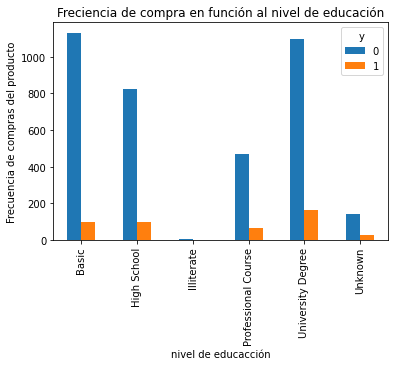

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.title('Freciencia de compra en función al nivel de educación')
plt.xlabel('nivel de educacción')
plt.ylabel('Frecuencia de compras del producto')

Text(0, 0.5, 'Proporción de clientes')

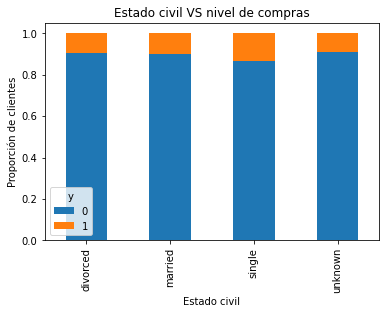

In [213]:
# utilizamos div para verlo a proporcíon
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Estado civil VS nivel de compras')
plt.xlabel('Estado civil')
plt.ylabel('Proporción de clientes')

### Observación
podemos asumir que el estado civil no es factor para que alguien compre o no.

Text(0, 0.5, 'Frecuencia de compras del producto')

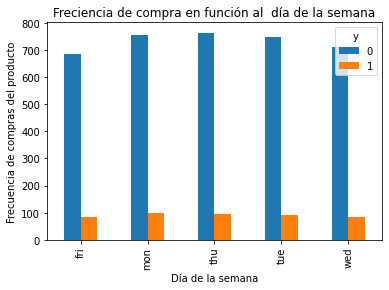

In [214]:
pd.crosstab(data.day_of_week, data.y).plot(kind='bar')
plt.title('Freciencia de compra en función al  día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compras del producto')

Ahora en proporción apilada

Text(0, 0.5, 'Frecuencia de compras del producto')

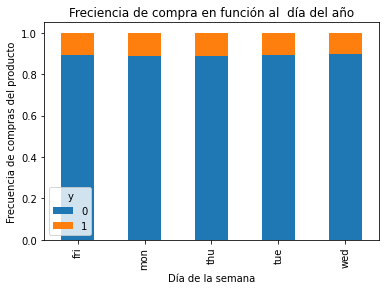

In [215]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Freciencia de compra en función al  día del año')
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia de compras del producto')

### Observación
podemos asumir que el día de la semana no es factor para que alguien compre o no.

Text(0, 0.5, 'Frecuencia de compras del producto')

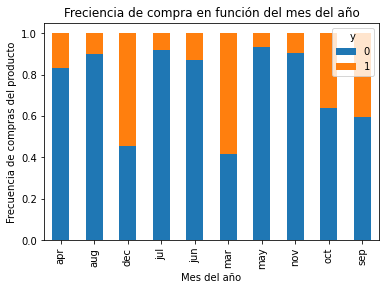

In [216]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Freciencia de compra en función del mes del año')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compras del producto')

Text(0, 0.5, 'Frecuencia de compras del producto')

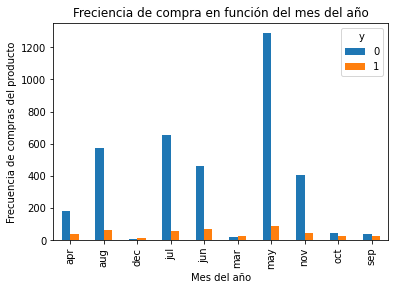

In [217]:
# pd.crosstab(data.month, data.y).plot(kind='bar')
table.plot(kind='bar', stacked=False)
plt.title('Freciencia de compra en función del mes del año')
plt.xlabel('Mes del año')
plt.ylabel('Frecuencia de compras del producto')

Text(0, 0.5, 'Cliente')

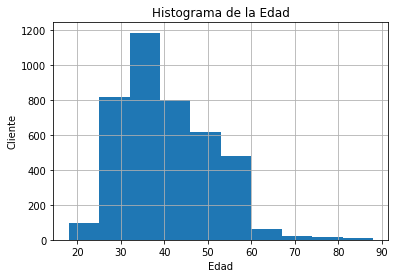

In [218]:
data.age.hist()
plt.title('Histograma de la Edad')
plt.xlabel('Edad')
plt.ylabel('Cliente')

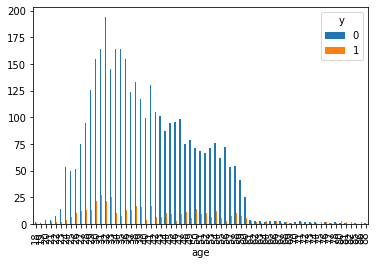

In [219]:
pd.crosstab(data.age, data.y).plot(kind='bar')

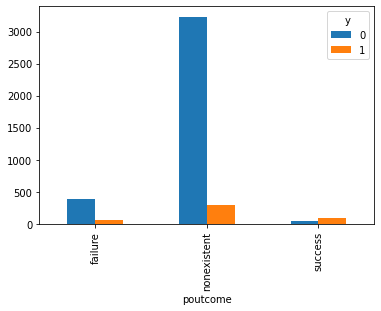

In [220]:
pd.crosstab(data.poutcome, data.y).plot(kind='bar')

### Conversión de variables categóricas a dummies

In [221]:
categories = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for category in categories:
  cat_list = 'cat' + '_' + category
  cat_dummies = pd.get_dummies(data[category], prefix=category)
  data_new = data.join(cat_dummies)
  data = data_new

In [222]:
data_vars = data.columns.values.tolist()

In [223]:
to_keep = [var for var in data_vars if var not in categories]
# to_keep = [var for var in data_vars if var not in ['default']]

In [224]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [225]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [var for var in bank_data_vars if var not in Y]

### selección de rasgos para el modelo

In [226]:
n = 12

In [227]:
from sklearn import datasets
from  sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [228]:
lr = LogisticRegression(solver='liblinear')

In [229]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

In [230]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]


In [231]:
print(rfe.ranking_)

[35 41 18 45  1 14 27 25  1 40 22  3  1 37  2 42  1  5 30 33 12 47 19 44
 31 50 26 13 48 21 32  8 36 34 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 46 38 28 43 29 11  1  7  1]


In [232]:
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)

In [233]:
list(z)

[('age', False, 35),
 ('duration', False, 41),
 ('campaign', False, 18),
 ('pdays', False, 45),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 40),
 ('y', False, 22),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 37),
 ('job_housemaid', False, 2),
 ('job_management', False, 42),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 30),
 ('job_student', False, 33),
 ('job_technician', False, 12),
 ('job_unemployed', False, 47),
 ('job_unknown', False, 19),
 ('marital_divorced', False, 44),
 ('marital_married', False, 31),
 ('marital_single', False, 50),
 ('marital_unknown', False, 26),
 ('education_Basic', False, 13),
 ('education_High School', False, 48),
 ('education_Illiterate', False, 21),
 ('education_Professional Course', False, 32),
 ('education_University Degree', False, 8),
 ('education_U

In [234]:
cols = ['previous', 'euribor3m', 'job_blue-collar', 'job_retired', 'month_aug',
        'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_nov', 'day_of_week_wed', 'poutcome_nonexistent']


In [235]:
X = bank_data[cols]
Y = bank_data['y']

### Implementación del modelo en Python con statamodels.api
[stats models pagina](https://www.statsmodels.org/dev/gettingstarted.html)

In [236]:
import statsmodels.api as sm

In [237]:
logit_model = sm.Logit(Y, X)

In [238]:
# se ejecuta el Método de Newton-Raphson
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [239]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2022-11-30 02:42  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementación del modelo en Python con scikit-learn

In [240]:
from sklearn import linear_model

In [241]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X, Y)

LogisticRegression()

In [242]:
logit_model.score(X, Y)

0.8958485069191552

In [243]:
Y.mean()

0.10949259529011895

In [244]:
pd.DataFrame(zip(X.columns, np.transpose(logit_model.coef_)))

,0,1
0,previous,[0.5362541179381792]
1,euribor3m,[-0.5443670397995843]
2,job_blue-collar,[-0.35331387435131284]
3,job_retired,[0.36165159081170056]
4,month_aug,[0.629258889507198]
5,month_dec,[1.1943974572117666]
6,month_jul,[0.9630554140662233]
7,month_jun,[1.05668970564699]
8,month_mar,[1.6386680234582967]
9,month_nov,[0.45770841910592247]


### Validación del modelo logístico

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.30, random_state=0)

In [247]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [248]:
from IPython.display import display, Math, Latex
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

In [249]:
probs = lm.predict_proba(X_test)

In [250]:
prediction = lm.predict(X_test)

In [251]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [252]:
# en un caso generico
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [253]:
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
prob_df

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0
...,...,...
1231,0.062222,0
1232,0.062157,0
1233,0.349016,1
1234,0.026190,0


In [254]:
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,846
1,390


In [255]:
390/len(prob_df)*100

31.55339805825243

In [256]:
threshold = 0.15
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,915
1,321


In [257]:
321/len(prob_df)*100

25.970873786407765

In [258]:
threshold = 0.05
prob_df['prediction'] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns='count')

col_0,count
prediction,
0,504
1,732


In [259]:
732/len(prob_df)*100

59.22330097087378

In [260]:
from sklearn import metrics

In [261]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

### Validación cruzada

#### K fold validation

In [262]:
from sklearn.model_selection import cross_val_score

In [263]:
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=10)

In [264]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

### Lo mas normal es pedir el promedio de las predicciones

In [265]:
scores.mean()

0.8943903101599225

### Matrices de confusión y curvas ROC

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3,random_state=0)

In [267]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [268]:
probs = lm.predict_proba(X_test)

In [269]:
# todas las filas pero solo la primer columna
prob = probs[:, 1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df['prediction'] = np.where(prob_df[0] > threshold, 1, 0)
prob_df['actual'] = list(Y_test)
prob_df

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0
...,...,...,...
1231,0.062222,0,0
1232,0.062157,0,0
1233,0.349016,1,0
1234,0.026190,0,0


In [270]:
confusion_matrix = pd.crosstab( prob_df.prediction, prob_df.actual)

In [271]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


In [272]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [273]:
sens = TP / (TP + FN)
sens

0.21025641025641026

In [274]:
espc_1 = 1 - TN / (TN + FP)
espc_1

0.047281323877068515

In [275]:
thresholds= [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]
for t in thresholds:

  prob_df['prediction'] = np.where(prob_df[0] >= t, 1, 0)
  prob_df['actual'] = list(Y_test)
  # prob_df.head()
  confusion_matrix = pd.crosstab( prob_df.prediction, prob_df.actual)

  TN = confusion_matrix[0][0]
  TP = confusion_matrix[1][1]
  FP = confusion_matrix[0][1]
  FN = confusion_matrix[1][0]

  sens = TP / (TP + FN)
  sensitivities.append(sens)
  espc_1 = 1 - TN / (TN + FP)
  especifities_1.append(espc_1)


sensitivities.append(0)
especifities_1.append(0)


In [276]:
sensitivities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6229508196721312,
 0.5163934426229508,
 0.45081967213114754,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.12295081967213115,
 0]

In [277]:
especifities_1

[1,
 0.7800718132854578,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.21992818671454217,
 0.12387791741472176,
 0.08617594254937166,
 0.07181328545780974,
 0.06463195691202872,
 0.022441651705565557,
 0.013464991023339312,
 0]

Text(0.5, 1.0, 'Curva ROC')

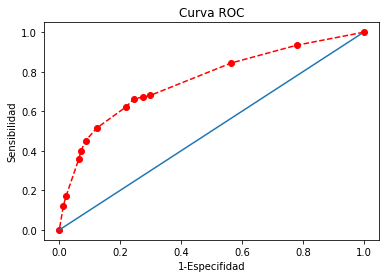

In [278]:
plt.plot(especifities_1, sensitivities, marker='o', linestyle='--', color='r')

x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]

plt.plot(x,y)
plt.xlabel('1-Especifidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')

In [279]:
from sklearn import metrics


In [280]:
# calcular la taza de falsos positivos y sensibilidad
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [281]:
df = pd.DataFrame({
    'x': espc_1,
    'y': sensit
})

In [282]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


In [283]:
from pandas import Timestamp
import plotnine as p9

In [284]:
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [285]:
df = pd.DataFrame({
    'x': espc_1,
    'y': sensit
})

In [286]:
auc = metrics.auc(espc_1, sensit)
auc

0.7579171204049798